### EDA_Penetracion-totales.ipynb

## Introducción

### Contexto General
Los datos analizados en este notebook provienen del **Ente Nacional de Comunicaciones (ENACOM)** de Argentina, el organismo 
regulador de las telecomunicaciones en el país.

### Descripción del Conjunto de Datos
Este análisis se centra en la hoja de datos **"Totales de penetración de internet."**, que proporciona un panorama general 
sobre el alcance del acceso a internet en Argentina.

### Objetivo del Análisis
El propósito de este análisis es **evaluar la evolución de la penetración de internet en el tiempo**, considerando 
diferencias regionales y posibles tendencias en el acceso a la red.

In [1]:

# 1 Cargar el archivo y normalizar los nombres

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Reemplaza el nombre del archivo con el que quieres evaluar y modificar
nombre_archivo = "Penetracion-totales.csv"

# Ruta completa al archivo
ruta_completa = os.path.join(r"C:\Users\USUARIO\OneDrive - Secretaria de Educacion del Distrito\Escritorio\SOYhENRY\PI_21\PI_2_DA_corregido\data_internet_ind", nombre_archivo)

# Verificar si el archivo existe antes de cargarlo
if os.path.exists(ruta_completa):
	# Cargar el archivo CSV
	df = pd.read_csv(ruta_completa)
	print("Archivo cargado exitosamente.")
else:
	print(f"Error: El archivo '{ruta_completa}' no existe.")



Archivo cargado exitosamente.


In [2]:
# Extraer el nombre de las columnas
nombres_columnas = df.columns.tolist()
print("Nombres de las columnas:")
print(nombres_columnas)


Nombres de las columnas:
['Año', 'Trimestre', 'Accesos por cada 100 hogares', 'Accesos por cada 100 hab', 'Periodo']


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           42 non-null     int64 
 1   Trimestre                     42 non-null     int64 
 2   Accesos por cada 100 hogares  42 non-null     int64 
 3   Accesos por cada 100 hab      42 non-null     int64 
 4   Periodo                       42 non-null     object
dtypes: int64(4), object(1)
memory usage: 1.8+ KB
None


In [4]:
# Verificar si existe la columna "Trimestre"
if 'Trimestre' in df.columns:
    # Convertir la columna "Trimestre" a tipo int64 si no lo es
    if not pd.api.types.is_integer_dtype(df['Trimestre']):
        try:
            # Intentar convertir a int64
            df['Trimestre'] = df['Trimestre'].astype('int64')
            print("La columna 'Trimestre' ha sido convertida a int64.")
        except ValueError as e:
            print(f"No se pudo convertir la columna 'Trimestre' a int64 debido a un error: {e}")
            # Manejar valores no convertibles, como NaN o strings
            df['Trimestre'] = pd.to_numeric(df['Trimestre'], errors='coerce').astype('Int64')
            print("Los valores no válidos han sido convertidos a NaN y el tipo de la columna es Int64.")
    else:
        print("La columna 'Trimestre' ya es de tipo int64.")
else:
    print("La columna 'Trimestre' no existe en el DataFrame.")


La columna 'Trimestre' ya es de tipo int64.


In [5]:
# Crear la columna 'Trimestre_Label' basada en 'Trimestre'
if 'Trimestre' in df.columns:
    # Asegurar que 'Trimestre' esté en tipo entero
    df['Trimestre'] = df['Trimestre'].astype(int)

    # Mapear los valores de trimestre a etiquetas descriptivas
    trimestre_labels = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}
    df['Trimestre_Label'] = df['Trimestre'].map(trimestre_labels)
    print("Se ha creado la columna 'Trimestre_Label' con etiquetas descriptivas.")
else:
    print("La columna 'Trimestre' no existe. No se pudo crear 'Trimestre_Label'.")


Se ha creado la columna 'Trimestre_Label' con etiquetas descriptivas.


In [6]:
# Mostrar información básica del DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           42 non-null     int64 
 1   Trimestre                     42 non-null     int64 
 2   Accesos por cada 100 hogares  42 non-null     int64 
 3   Accesos por cada 100 hab      42 non-null     int64 
 4   Periodo                       42 non-null     object
 5   Trimestre_Label               42 non-null     object
dtypes: int64(4), object(2)
memory usage: 2.1+ KB
None


In [7]:
# Normalizar los nombres de columnas si existen
columnas_a_normalizar = ['Provincia', 'Partido', 'Localidad']
for columna in columnas_a_normalizar:
    if columna in df.columns:
        df[columna] = df[columna].str.strip().str.upper()


In [8]:
# 2: Reemplazar variaciones específicas

# Reemplazar variaciones específicas en 'Provincia' si existe
if 'Provincia' in df.columns:
    df['Provincia'] = df['Provincia'].replace({
        'BS AS': 'BUENOS AIRES',
        'CIUDAD AUTONOMA DE BUENOS AIRES': 'CABA',
        'CAPITAL FEDERAL': 'CABA',
        'CORDOBA': 'CÓRDOBA',
        'ENTRE RIOS': 'ENTRE RÍOS',
        'RIO NEGRO': 'RÍO NEGRO',
        'TUCUMAN': 'TUCUMÁN',
        'NEUQUEN': 'NEUQUÉN'
        # Agrega más reemplazos según sea necesario y dependiente del archivo
    })
    print("\nValores únicos en 'Provincia' después de los reemplazos:")
    print(df['Provincia'].unique())
else:
    print("La columna 'Provincia' no existe en el DataFrame.")

# Reemplazar valores en 'Partido' si existe
if 'Partido' in df.columns:
    df['Partido'] = df['Partido'].replace({
        'SAN ISIDRO': 'SAN ISIDRO',
        'TIGRE': 'TIGRE'
        # Agrega más reemplazos según sea necesario
    })
    print("\nValores únicos en 'Partido' después de los reemplazos:")
    print(df['Partido'].unique())
else:
    print("La columna 'Partido' no existe en el DataFrame.")

# Reemplazar valores en 'Localidad' si existe
if 'Localidad' in df.columns:
    df['Localidad'] = df['Localidad'].replace({
        'VICENTE LOPEZ': 'VICENTE LÓPEZ',
        'SAN FERNANDO': 'SAN FERNANDO'
        # Agrega más reemplazos según sea necesario
    })
    print("\nValores únicos en 'Localidad' después de los reemplazos:")
    print(df['Localidad'].unique())
else:
    print("La columna 'Localidad' no existe en el DataFrame.")


La columna 'Provincia' no existe en el DataFrame.
La columna 'Partido' no existe en el DataFrame.
La columna 'Localidad' no existe en el DataFrame.


In [9]:
import sweetviz as sv
from skimpy import skim

c:\Program Files\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
# Verificar la carga
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           42 non-null     int64 
 1   Trimestre                     42 non-null     int64 
 2   Accesos por cada 100 hogares  42 non-null     int64 
 3   Accesos por cada 100 hab      42 non-null     int64 
 4   Periodo                       42 non-null     object
 5   Trimestre_Label               42 non-null     object
dtypes: int64(4), object(2)
memory usage: 2.1+ KB
None
    Año  Trimestre  Accesos por cada 100 hogares  Accesos por cada 100 hab  \
0  2024          2                            78                        24   
1  2024          1                            78                        24   
2  2023          4                            78                        24   
3  2023          3                            77                   

In [11]:
from skimpy import skim

# Resumen del DataFrame
skim(df)


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 42     │ │ int64       │ 4     │                                                          │
│ │ Number of columns │ 6      │ │ string      │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column                   ┃ NA  ┃ NA %  ┃ mean   ┃ sd     ┃ p0    ┃ p25   ┃ p50   ┃ p75    ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ Año                      │   0 │     0 │   2019 │  3.075 │  2014 │  2016 │  2019 │   2021 │  2024 │ ▇▇▃▇▇▆ │  │
│ │ Trimestre                │   0 │     0 │  2.452 │  1.131 │     1 │  1.25 │     2 │      3 │     4 │ ▇ ▇ ▇▇ │  │
│ │ Accesos por cada 100     │   0 │     0 │  62.62 │  10.01 │    49 │    53 │    62 │  72.25 │    78 │ ▇▃▃▅▃▆ │  │
│ │ hogares                  │     │       │        │        │       │       │       │        │       │        │  │
│ │ Accesos por cada 100 hab │   0 │     0 │  19.07 │  3.264 │    15 │    16 │    19 │  21.75 │    24 │ ▇▁▅▁▃▆ │  │
│ └──────────────────────────┴─────┴───────┴────────┴────────┴───────┴───────┴───────┴────────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃           ┃    ┃      ┃           ┃           ┃           ┃           ┃ chars per ┃ words per ┃ total      ┃  │
│ ┃ column    ┃ NA ┃ NA % ┃ shortest  ┃ longest   ┃ min       ┃ max       ┃ row       ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ Periodo   │  0 │    0 │ Abr-Jun   │ Jul-Sept  │ Abr-Jun   │ Oct-Dic   │      12.2 │         2 │         84 │  │
│ │           │    │      │ 2024      │ 2023      │ 2014      │ 2023      │           │           │            │  │
│ │ Trimestre │  0 │    0 │ Q2        │ Q2        │ Q1        │ Q4        │         2 │         1 │         42 │  │
│ │ _Label    │    │      │           │           │           │           │           │           │            │  │
│ └───────────┴────┴──────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯


Estadísticas descriptivas del DataFrame (incluyendo todas las columnas):
                Año  Trimestre  Accesos por cada 100 hogares  \
count     42.000000  42.000000                     42.000000   
unique          NaN        NaN                           NaN   
top             NaN        NaN                           NaN   
freq            NaN        NaN                           NaN   
mean    2018.761905   2.452381                     62.619048   
std        3.074756   1.130560                     10.007198   
min     2014.000000   1.000000                     49.000000   
25%     2016.000000   1.250000                     53.000000   
50%     2019.000000   2.000000                     62.000000   
75%     2021.000000   3.000000                     72.250000   
max     2024.000000   4.000000                     78.000000   

        Accesos por cada 100 hab       Periodo Trimestre_Label  
count                  42.000000            42              42  
unique                     

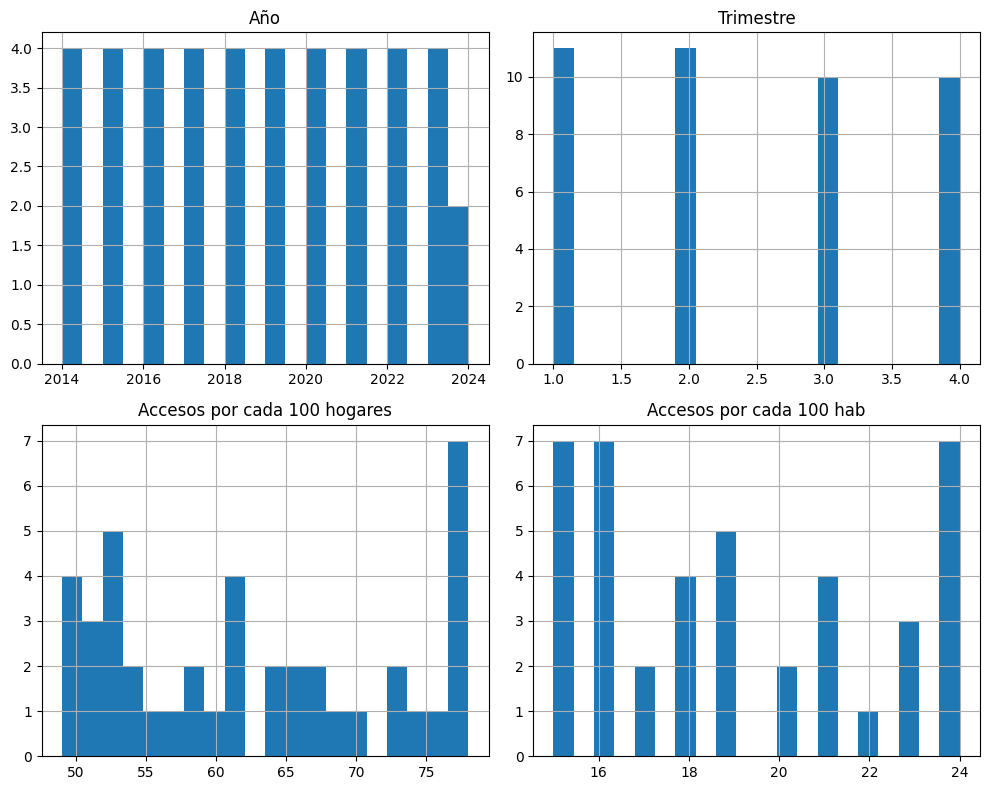

In [12]:
# 3: Estadísticas descriptivas y análisis exploratorio

# Estadísticas descriptivas para columnas numéricas y de tipo object
print("\nEstadísticas descriptivas del DataFrame (incluyendo todas las columnas):")
print(df.describe(include='all'))

# Histogramas de las columnas numéricas
df.select_dtypes(include=[np.number]).hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()


Matriz de correlación entre columnas numéricas:
                                   Año  Trimestre  \
Año                           1.000000  -0.073505   
Trimestre                    -0.073505   1.000000   
Accesos por cada 100 hogares  0.981478   0.028539   
Accesos por cada 100 hab      0.976294   0.017468   

                              Accesos por cada 100 hogares  \
Año                                               0.981478   
Trimestre                                         0.028539   
Accesos por cada 100 hogares                      1.000000   
Accesos por cada 100 hab                          0.995493   

                              Accesos por cada 100 hab  
Año                                           0.976294  
Trimestre                                     0.017468  
Accesos por cada 100 hogares                  0.995493  
Accesos por cada 100 hab                      1.000000  


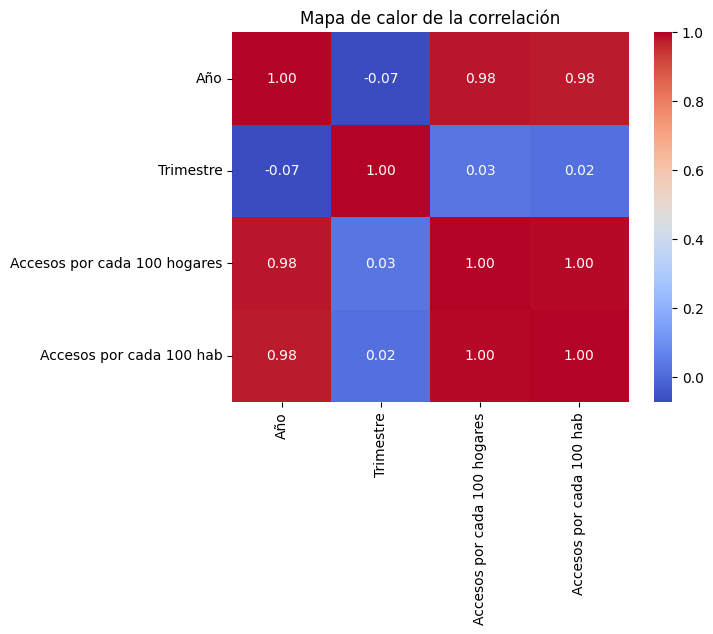

In [13]:
# Seleccionar solo las columnas numéricas
df_numerico = df.select_dtypes(include=['number'])

# Verificar si hay columnas numéricas antes de calcular la correlación
if not df_numerico.empty:
    # Calcular la matriz de correlación
    correlacion = df_numerico.corr()

    # Imprimir la matriz de correlación
    print("\nMatriz de correlación entre columnas numéricas:")
    print(correlacion)

    # Visualizar el mapa de calor de la correlación
    sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Mapa de calor de la correlación")
    plt.show()
else:
    print("\nNo hay columnas numéricas en el DataFrame para calcular la correlación.")


In [14]:
# Correlación entre columnas no numéricas usando tablas de contingencia
for col1 in df.select_dtypes(include=['object']).columns:
    for col2 in df.select_dtypes(include=['object']).columns:
        if col1 != col2:
            tabla_contingencia = pd.crosstab(df[col1], df[col2])
            print(f"Tabla de contingencia entre {col1} y {col2}:")
            print(tabla_contingencia)

Tabla de contingencia entre Periodo y Trimestre_Label:
Trimestre_Label  Q1  Q2  Q3  Q4
Periodo                        
Abr-Jun 2014      0   1   0   0
Abr-Jun 2015      0   1   0   0
Abr-Jun 2016      0   1   0   0
Abr-Jun 2017      0   1   0   0
Abr-Jun 2018      0   1   0   0
Abr-Jun 2019      0   1   0   0
Abr-Jun 2020      0   1   0   0
Abr-Jun 2021      0   1   0   0
Abr-Jun 2022      0   1   0   0
Abr-Jun 2023      0   1   0   0
Abr-Jun 2024      0   1   0   0
Ene-Mar 2014      1   0   0   0
Ene-Mar 2015      1   0   0   0
Ene-Mar 2016      1   0   0   0
Ene-Mar 2017      1   0   0   0
Ene-Mar 2018      1   0   0   0
Ene-Mar 2019      1   0   0   0
Ene-Mar 2020      1   0   0   0
Ene-Mar 2021      1   0   0   0
Ene-Mar 2022      1   0   0   0
Ene-Mar 2023      1   0   0   0
Ene-Mar 2024      1   0   0   0
Jul-Sept 2014     0   0   1   0
Jul-Sept 2015     0   0   1   0
Jul-Sept 2016     0   0   1   0
Jul-Sept 2017     0   0   1   0
Jul-Sept 2018     0   0   1   0
Jul-Sept 2019    

Tabla de contingencia entre Periodo y Trimestre_Label:
Trimestre_Label  Q1  Q2  Q3  Q4
Periodo                        
Abr-Jun 2014      0   1   0   0
Abr-Jun 2015      0   1   0   0
Abr-Jun 2016      0   1   0   0
Abr-Jun 2017      0   1   0   0
Abr-Jun 2018      0   1   0   0
Abr-Jun 2019      0   1   0   0
Abr-Jun 2020      0   1   0   0
Abr-Jun 2021      0   1   0   0
Abr-Jun 2022      0   1   0   0
Abr-Jun 2023      0   1   0   0
Abr-Jun 2024      0   1   0   0
Ene-Mar 2014      1   0   0   0
Ene-Mar 2015      1   0   0   0
Ene-Mar 2016      1   0   0   0
Ene-Mar 2017      1   0   0   0
Ene-Mar 2018      1   0   0   0
Ene-Mar 2019      1   0   0   0
Ene-Mar 2020      1   0   0   0
Ene-Mar 2021      1   0   0   0
Ene-Mar 2022      1   0   0   0
Ene-Mar 2023      1   0   0   0
Ene-Mar 2024      1   0   0   0
Jul-Sept 2014     0   0   1   0
Jul-Sept 2015     0   0   1   0
Jul-Sept 2016     0   0   1   0
Jul-Sept 2017     0   0   1   0
Jul-Sept 2018     0   0   1   0
Jul-Sept 2019    

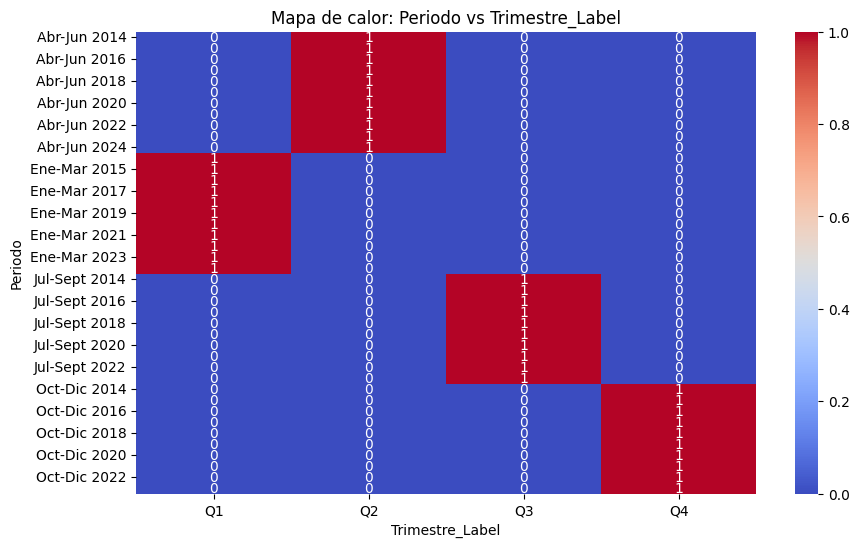

Tabla de contingencia entre Trimestre_Label y Periodo:
Periodo          Abr-Jun 2014  Abr-Jun 2015  Abr-Jun 2016  Abr-Jun 2017  \
Trimestre_Label                                                           
Q1                          0             0             0             0   
Q2                          1             1             1             1   
Q3                          0             0             0             0   
Q4                          0             0             0             0   

Periodo          Abr-Jun 2018  Abr-Jun 2019  Abr-Jun 2020  Abr-Jun 2021  \
Trimestre_Label                                                           
Q1                          0             0             0             0   
Q2                          1             1             1             1   
Q3                          0             0             0             0   
Q4                          0             0             0             0   

Periodo          Abr-Jun 2022  Abr-Jun 2023

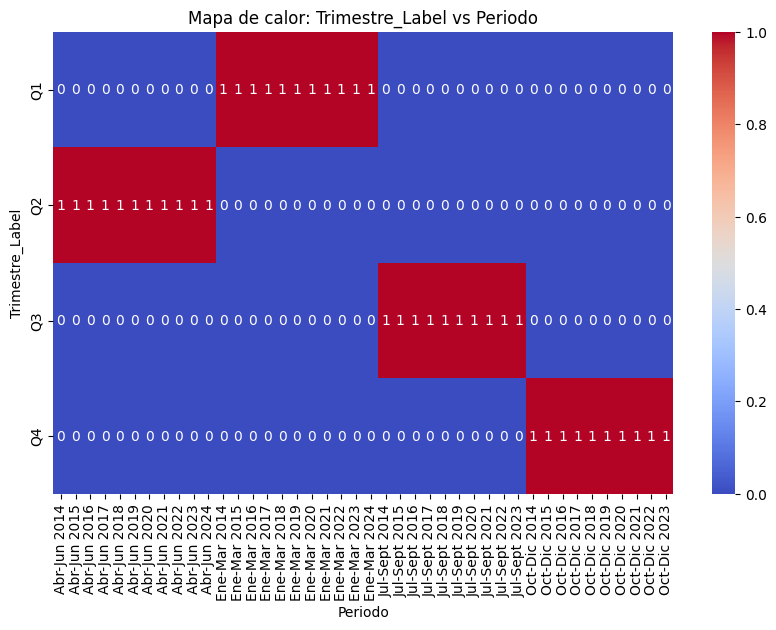

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Iterar sobre combinaciones de columnas categóricas (no numéricas)
for col1 in df.select_dtypes(include=['object']).columns:
    for col2 in df.select_dtypes(include=['object']).columns:
        if col1 != col2:  # Evitar el caso donde se compara una columna consigo misma
            # Crear tabla de contingencia
            tabla_contingencia = pd.crosstab(df[col1], df[col2])
            print(f"Tabla de contingencia entre {col1} y {col2}:")
            print(tabla_contingencia)
            
            # Visualizar la tabla como un mapa de calor
            plt.figure(figsize=(10, 6))
            sns.heatmap(tabla_contingencia, annot=True, cmap='coolwarm', fmt='d')
            plt.title(f"Mapa de calor: {col1} vs {col2}")
            plt.xlabel(col2)
            plt.ylabel(col1)
            plt.show()


In [16]:
#  6: Cálculo de Z-scores

from scipy.stats import zscore

# Calcular Z-scores para columnas numéricas
z_scores = df.select_dtypes(include=[np.number]).apply(zscore)
print("\nZ-scores de las columnas numéricas:")
print(z_scores)


Z-scores de las columnas numéricas:
         Año  Trimestre  Accesos por cada 100 hogares  \
0   1.724231  -0.404989                      1.555620   
1   1.724231  -1.300229                      1.555620   
2   1.395060   1.385490                      1.555620   
3   1.395060   0.490250                      1.454480   
4   1.395060  -0.404989                      1.454480   
5   1.395060  -1.300229                      1.454480   
6   1.065888   1.385490                      1.454480   
7   1.065888   0.490250                      1.353341   
8   1.065888  -0.404989                      1.252202   
9   1.065888  -1.300229                      1.049923   
10  0.736717   1.385490                      1.049923   
11  0.736717   0.490250                      0.746505   
12  0.736717  -0.404989                      0.645365   
13  0.736717  -1.300229                      0.443087   
14  0.407546   1.385490                      0.443087   
15  0.407546   0.490250                      0.3419

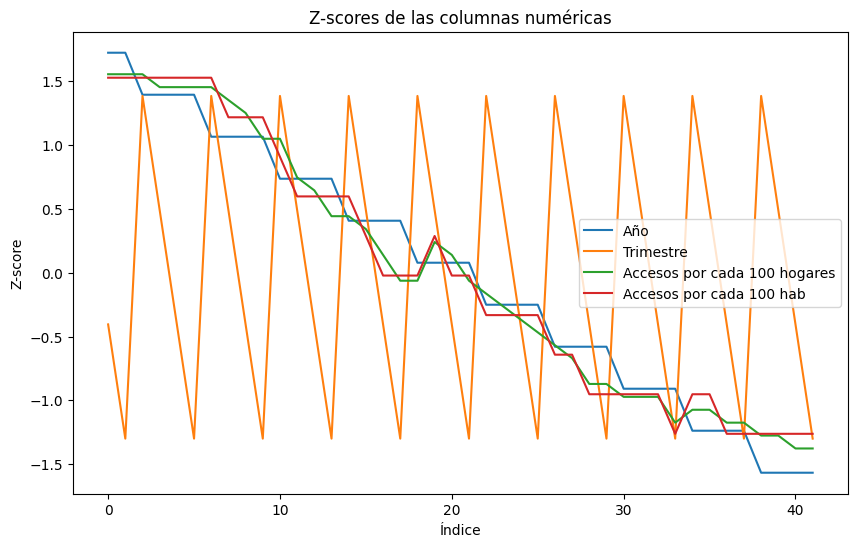

In [17]:
import matplotlib.pyplot as plt

# Graficar Z-scores de las columnas numéricas
plt.figure(figsize=(10, 6))
plt.plot(z_scores)
plt.title('Z-scores de las columnas numéricas')
plt.xlabel('Índice')
plt.ylabel('Z-score')
plt.legend(z_scores.columns)  # Para mostrar el nombre de cada columna en la leyenda
plt.show()


In [18]:
# Conteo de categorías en columnas de tipo object
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nConteo de categorías en la columna '{col}':")
    print(df[col].value_counts())


Conteo de categorías en la columna 'Periodo':
Periodo
Abr-Jun 2024     1
Ene-Mar 2024     1
Oct-Dic 2023     1
Jul-Sept 2023    1
Abr-Jun 2023     1
Ene-Mar 2023     1
Oct-Dic 2022     1
Jul-Sept 2022    1
Abr-Jun 2022     1
Ene-Mar 2022     1
Oct-Dic 2021     1
Jul-Sept 2021    1
Abr-Jun 2021     1
Ene-Mar 2021     1
Oct-Dic 2020     1
Jul-Sept 2020    1
Abr-Jun 2020     1
Ene-Mar 2020     1
Oct-Dic 2019     1
Jul-Sept 2019    1
Abr-Jun 2019     1
Ene-Mar 2019     1
Oct-Dic 2018     1
Jul-Sept 2018    1
Abr-Jun 2018     1
Ene-Mar 2018     1
Oct-Dic 2017     1
Jul-Sept 2017    1
Abr-Jun 2017     1
Ene-Mar 2017     1
Oct-Dic 2016     1
Jul-Sept 2016    1
Abr-Jun 2016     1
Ene-Mar 2016     1
Oct-Dic 2015     1
Jul-Sept 2015    1
Abr-Jun 2015     1
Ene-Mar 2015     1
Oct-Dic 2014     1
Jul-Sept 2014    1
Abr-Jun 2014     1
Ene-Mar 2014     1
Name: count, dtype: int64

Conteo de categorías en la columna 'Trimestre_Label':
Trimestre_Label
Q2    11
Q1    11
Q4    10
Q3    10
Name: count, d

In [19]:
# Revisar columnas con valores negativos
columnas_negativas = df.select_dtypes(include=[np.number]).columns[df.select_dtypes(include=[np.number]).lt(0).any()]
print("\nColumnas con valores negativos:")
print(columnas_negativas)


Columnas con valores negativos:
Index([], dtype='object')


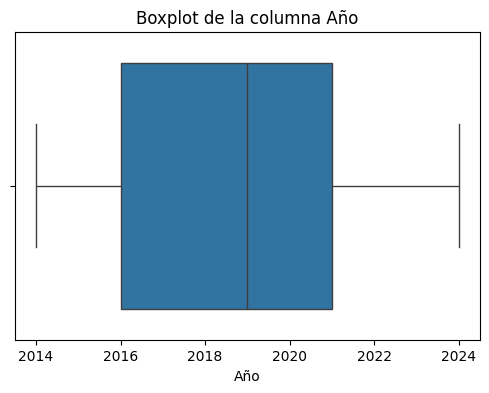

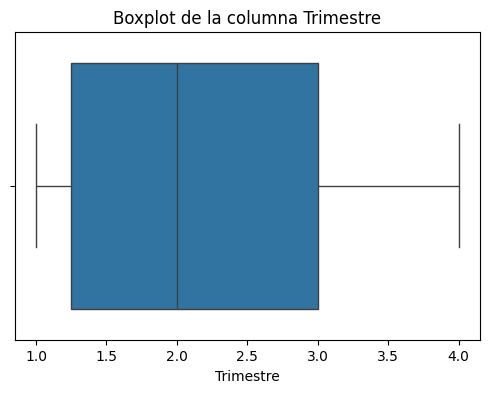

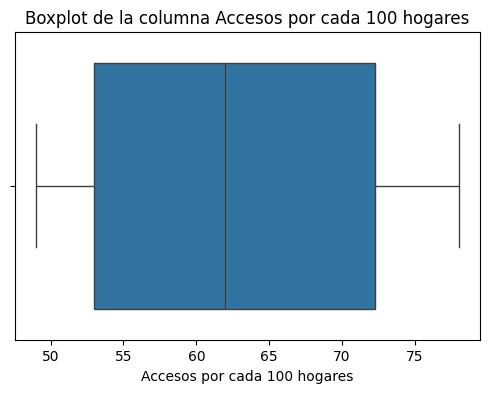

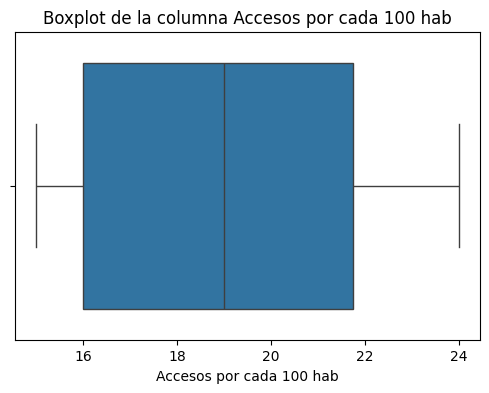

In [20]:
# Visualizar valores atípicos con un gráfico de caja
for columna in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[columna])
    plt.title(f"Boxplot de la columna {columna}")
    plt.show()

In [21]:
# Mostrar la cantidad de valores nulos por columna
print("\nCantidad de valores nulos por columna:")
print(df.isnull().sum())


Cantidad de valores nulos por columna:
Año                             0
Trimestre                       0
Accesos por cada 100 hogares    0
Accesos por cada 100 hab        0
Periodo                         0
Trimestre_Label                 0
dtype: int64


In [22]:
# Guardar los cambios en el mismo archivo CSV
df.to_csv(ruta_completa, index=False)
print(f"\nArchivo guardado: {ruta_completa}")


Archivo guardado: C:\Users\USUARIO\OneDrive - Secretaria de Educacion del Distrito\Escritorio\SOYhENRY\PI_21\PI_2_DA_corregido\data_internet_ind\Penetracion-totales.csv


In [23]:
# 16: Análisis de distribuciones (skewness y kurtosis)

# Excluir la columna 'Año' de las columnas numéricas
df_numerico_sin_ano = df.select_dtypes(include=[np.number])

print("\nSkewness (Asimetría) de las columnas numéricas:")
print(df_numerico_sin_ano.skew())

print("\nKurtosis (Curtosis) de las columnas numéricas:")
print(df_numerico_sin_ano.kurtosis())


Skewness (Asimetría) de las columnas numéricas:
Año                             0.024172
Trimestre                       0.070729
Accesos por cada 100 hogares    0.242073
Accesos por cada 100 hab        0.277950
dtype: float64

Kurtosis (Curtosis) de las columnas numéricas:
Año                            -1.186795
Trimestre                      -1.371727
Accesos por cada 100 hogares   -1.365305
Accesos por cada 100 hab       -1.350862
dtype: float64


In [24]:
# 17: Verificar la existencia de multicolinealidad entre variables numéricas
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calcular VIF para variables numéricas
X = df.select_dtypes(include=[np.number])

# Rellenar valores NaN con la media de la columna
X = X.fillna(X.mean())

X = add_constant(X)
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF (Factor de Inflación de la Varianza):")
print(vif)



VIF (Factor de Inflación de la Varianza):
                       Variable           VIF
0                         const  1.667882e+07
1                           Año  3.847202e+01
2                     Trimestre  1.429700e+00
3  Accesos por cada 100 hogares  1.676224e+02
4      Accesos por cada 100 hab  1.143920e+02


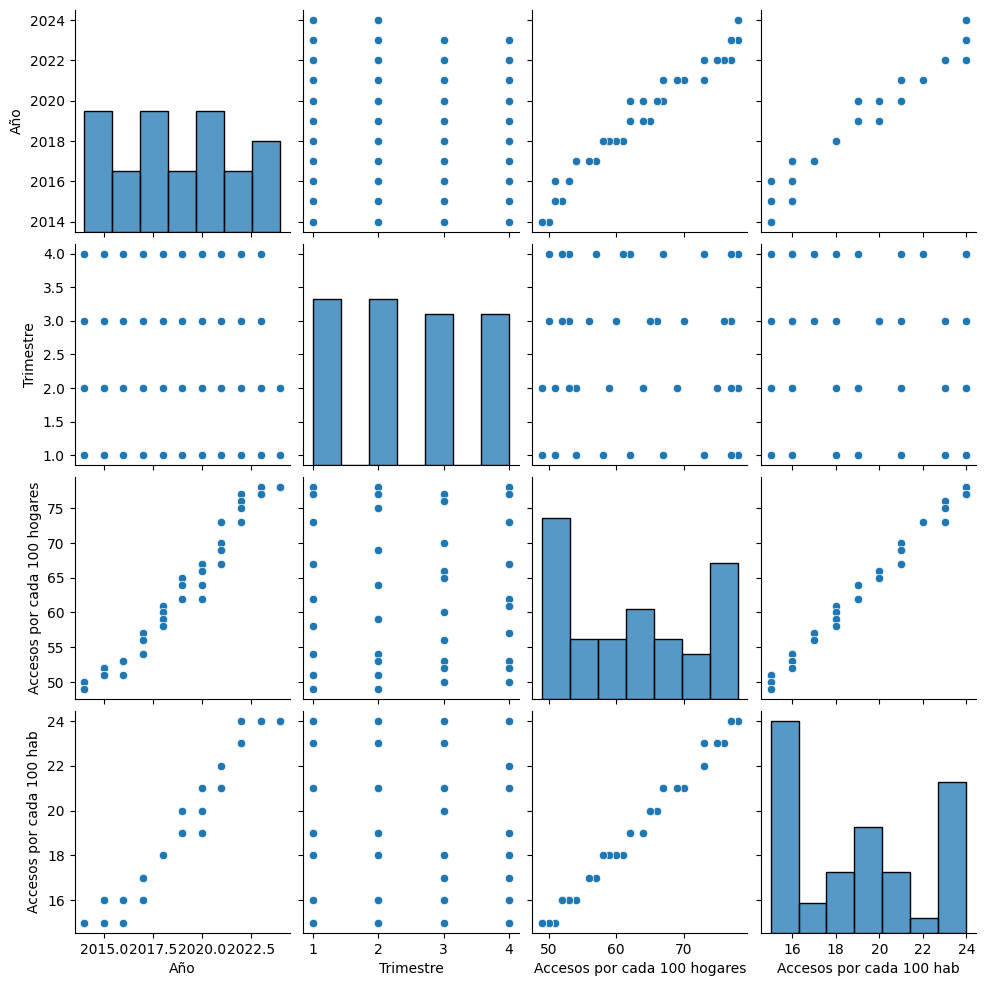

In [25]:
# 18: Visualizar la relación entre variables
sns.pairplot(df.select_dtypes(include=[np.number]))
plt.show()

In [26]:
# 19: Agrupamiento por categorías
for columna in df.select_dtypes(include=['object']).columns:
    print(f"\nEstadísticas por grupo de '{columna}':")
    print(df.groupby(columna).describe())


Estadísticas por grupo de 'Periodo':
                Año                                                      \
              count    mean std     min     25%     50%     75%     max   
Periodo                                                                   
Abr-Jun 2014    1.0  2014.0 NaN  2014.0  2014.0  2014.0  2014.0  2014.0   
Abr-Jun 2015    1.0  2015.0 NaN  2015.0  2015.0  2015.0  2015.0  2015.0   
Abr-Jun 2016    1.0  2016.0 NaN  2016.0  2016.0  2016.0  2016.0  2016.0   
Abr-Jun 2017    1.0  2017.0 NaN  2017.0  2017.0  2017.0  2017.0  2017.0   
Abr-Jun 2018    1.0  2018.0 NaN  2018.0  2018.0  2018.0  2018.0  2018.0   
Abr-Jun 2019    1.0  2019.0 NaN  2019.0  2019.0  2019.0  2019.0  2019.0   
Abr-Jun 2020    1.0  2020.0 NaN  2020.0  2020.0  2020.0  2020.0  2020.0   
Abr-Jun 2021    1.0  2021.0 NaN  2021.0  2021.0  2021.0  2021.0  2021.0   
Abr-Jun 2022    1.0  2022.0 NaN  2022.0  2022.0  2022.0  2022.0  2022.0   
Abr-Jun 2023    1.0  2023.0 NaN  2023.0  2023.0  2023.0  2023.

In [27]:
# 20: Verificar duplicados

print("\nNúmero de filas duplicadas:")
print(df.duplicated().sum())


Número de filas duplicadas:
0



Estadísticas por grupo de 'Periodo':
                  Año  Trimestre  Accesos por cada 100 hogares  \
Periodo                                                          
Abr-Jun 2014   2014.0        2.0                          49.0   
Abr-Jun 2015   2015.0        2.0                          51.0   
Abr-Jun 2016   2016.0        2.0                          53.0   
Abr-Jun 2017   2017.0        2.0                          54.0   
Abr-Jun 2018   2018.0        2.0                          59.0   
Abr-Jun 2019   2019.0        2.0                          64.0   
Abr-Jun 2020   2020.0        2.0                          64.0   
Abr-Jun 2021   2021.0        2.0                          69.0   
Abr-Jun 2022   2022.0        2.0                          75.0   
Abr-Jun 2023   2023.0        2.0                          77.0   
Abr-Jun 2024   2024.0        2.0                          78.0   
Ene-Mar 2014   2014.0        1.0                          49.0   
Ene-Mar 2015   2015.0        1.0      

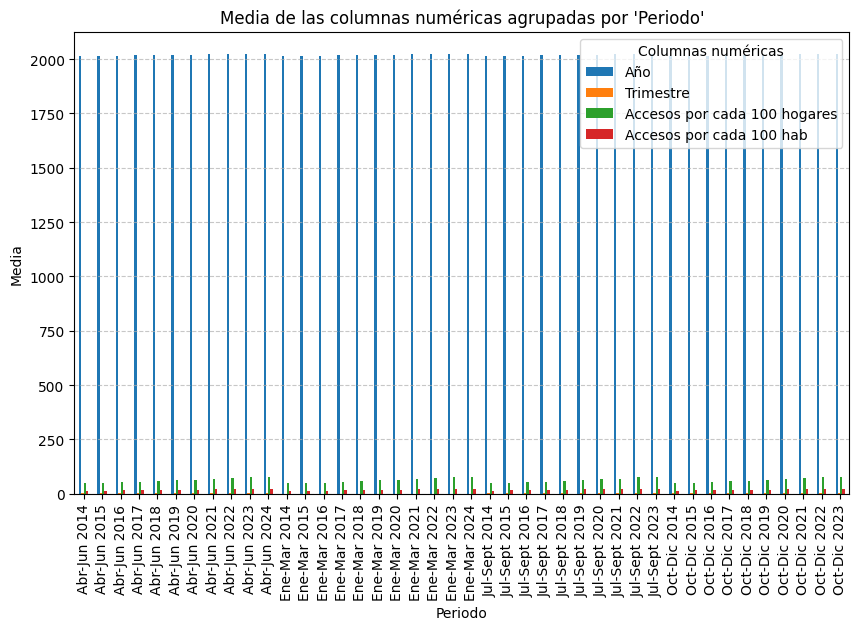


Estadísticas por grupo de 'Trimestre_Label':
                    Año  Trimestre  Accesos por cada 100 hogares  \
Trimestre_Label                                                    
Q1               2019.0        1.0                          62.0   
Q2               2019.0        2.0                          63.0   
Q3               2018.5        3.0                          62.5   
Q4               2018.5        4.0                          63.0   

                 Accesos por cada 100 hab  
Trimestre_Label                            
Q1                              19.000000  
Q2                              19.090909  
Q3                              19.000000  
Q4                              19.200000  


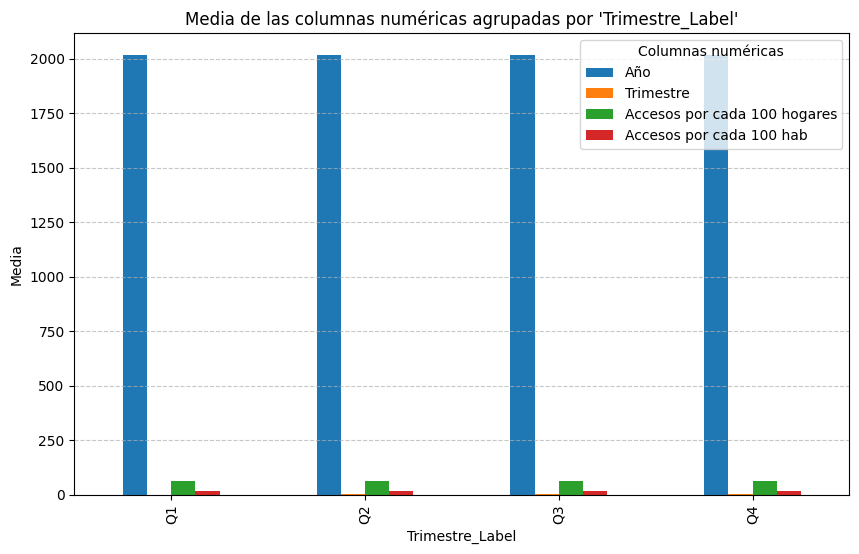

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Iterar sobre las columnas categóricas
for columna in df.select_dtypes(include=['object']).columns:
    # Seleccionar solo las columnas numéricas
    columnas_numericas = df.select_dtypes(include=['number']).columns
    
    # Calcular la media de las columnas numéricas agrupadas por la columna categórica
    stats_por_grupo = df.groupby(columna)[columnas_numericas].mean()
    
    print(f"\nEstadísticas por grupo de '{columna}':")
    print(stats_por_grupo)
    
    # Graficar las estadísticas
    stats_por_grupo.plot(kind='bar', figsize=(10, 6))
    plt.title(f"Media de las columnas numéricas agrupadas por '{columna}'")
    plt.xlabel(columna)
    plt.ylabel("Media")
    plt.legend(title="Columnas numéricas")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()



Outliers identificados en las columnas numéricas:
      Año  Trimestre  Accesos por cada 100 hogares  Accesos por cada 100 hab
0   False      False                         False                     False
1   False      False                         False                     False
2   False      False                         False                     False
3   False      False                         False                     False
4   False      False                         False                     False
5   False      False                         False                     False
6   False      False                         False                     False
7   False      False                         False                     False
8   False      False                         False                     False
9   False      False                         False                     False
10  False      False                         False                     False
11  False      False     

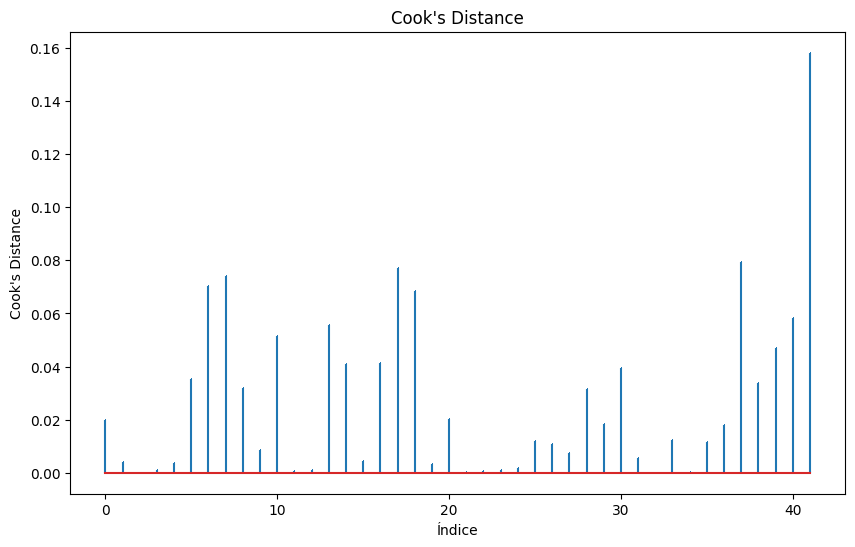

In [29]:
# Identificar outliers usando el método del rango intercuartílico (IQR)
def identificar_outliers(df):
    outliers = pd.DataFrame()
    for columna in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1
        outliers[columna] = ((df[columna] < (Q1 - 1.5 * IQR)) | (df[columna] > (Q3 + 1.5 * IQR)))
    return outliers

outliers = identificar_outliers(df)
print("\nOutliers identificados en las columnas numéricas:")
print(outliers)

# Identificar puntos influyentes usando el método de Cook's Distance
import statsmodels.api as sm

def identificar_puntos_influyentes(df):
    X = df.select_dtypes(include=[np.number]).drop(columns=['Año'])  # Excluir la columna 'Año' si no es relevante
    X = sm.add_constant(X)  # Agregar constante para el modelo
    y = df['Año']  # Suponiendo que 'Año' es la variable dependiente
    model = sm.OLS(y, X).fit()
    influence = model.get_influence()
    cooks_d = influence.cooks_distance[0]
    return cooks_d

cooks_d = identificar_puntos_influyentes(df)
print("\nCook's Distance para identificar puntos influyentes:")
print(cooks_d)

# Visualizar Cook's Distance
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
plt.title("Cook's Distance")
plt.xlabel("Índice")
plt.ylabel("Cook's Distance")
plt.show()

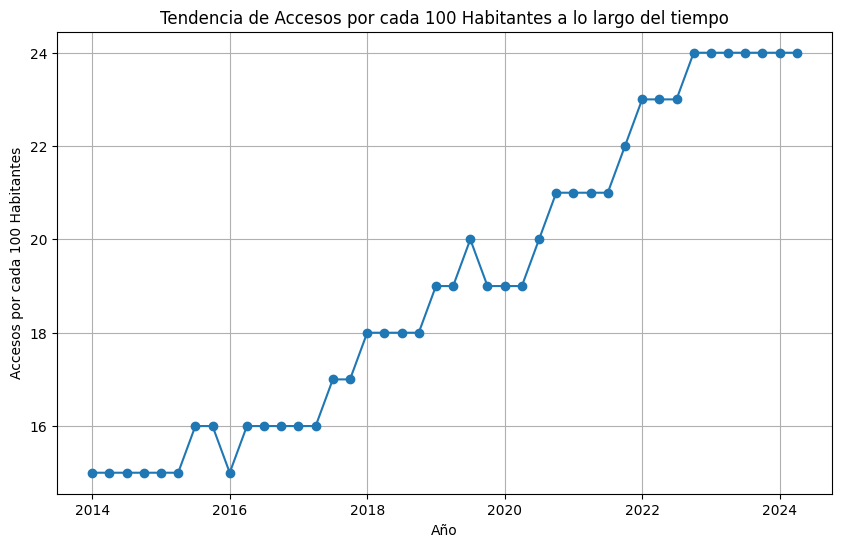

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(df['Año'] + (df['Trimestre'] - 1) / 4, df['Accesos por cada 100 hab'], marker='o')
plt.title('Tendencia de Accesos por cada 100 Habitantes a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 Habitantes')
plt.grid(True)
plt.show()

# Análisis Exploratorio de Datos (EDA) - Penetración de Internet en Argentina

## Introducción

### Contexto General
Los datos analizados en este notebook provienen del **Ente Nacional de Comunicaciones (ENACOM)** de Argentina, el organismo regulador de las telecomunicaciones en el país.

### Descripción del Conjunto de Datos
Este análisis se centra en la hoja de datos **"Totales de penetración de internet."**, que proporciona un panorama general sobre el alcance del acceso a internet en Argentina.

### Objetivo del Análisis
El propósito de este análisis es **evaluar la evolución de la penetración de internet en el tiempo**, considerando diferencias regionales y posibles tendencias en el acceso a la red.

## Contenido del Notebook

### 1. Cargar el archivo y normalizar los nombres
- Importación de librerías necesarias.
- Carga del archivo CSV y verificación de su existencia.
- Normalización de nombres de columnas.

### 2. Reemplazar variaciones específicas
- Reemplazo de variaciones específicas en las columnas 'Provincia', 'Partido' y 'Localidad'.

### 3. Estadísticas descriptivas y análisis exploratorio
- Generación de estadísticas descriptivas para columnas numéricas y de tipo objeto.
- Creación de histogramas para columnas numéricas.
- Cálculo y visualización de la matriz de correlación.
- Análisis de correlación entre columnas no numéricas usando tablas de contingencia.

### 4. Cálculo de Z-scores
- Cálculo de Z-scores para columnas numéricas.
- Visualización de Z-scores con gráficos.

### 5. Análisis de categorías y valores atípicos
- Conteo de categorías en columnas de tipo objeto.
- Revisión de columnas con valores negativos.
- Visualización de valores atípicos con gráficos de caja.
- Mostrar la cantidad de valores nulos por columna.

### 6. Guardar cambios
- Guardar los cambios realizados en el DataFrame en el mismo archivo CSV.

### 7. Análisis de distribuciones
- Cálculo de skewness (asimetría) y kurtosis (curtosis) para columnas numéricas.

### 8. Verificación de multicolinealidad
- Cálculo del Factor de Inflación de la Varianza (VIF) para variables numéricas.

### 9. Visualización de relaciones entre variables
- Creación de pairplots para visualizar relaciones entre variables numéricas.

### 10. Agrupamiento por categorías
- Generación de estadísticas descriptivas agrupadas por columnas categóricas.
- Visualización de estadísticas agrupadas con gráficos de barras.

### 11. Verificación de duplicados
- Conteo de filas duplicadas en el DataFrame.

## Conclusión
Este análisis exploratorio de datos proporciona una visión detallada de la evolución de la penetración de internet en Argentina, identificando tendencias y patrones importantes en el acceso a la red. Los resultados obtenidos pueden ser utilizados para tomar decisiones informadas y desarrollar estrategias para mejorar la conectividad en el país.